# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    #confusion_matrix,
    f1_score,
    make_scorer,
    #plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). **Make sure you explain your decisions whenever necessary.** 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

Some initial thoughts I have on the problem is that I think the number of previous cancellations will be the most useful feature, followed by previous un-canceled reservations, followed by repeated_guest or room price. My thought is that someone who cancels frequently will cancel again, and someone who rarely cancels will keep the reservation. Additionally, I think that a guest who has been there before is more likely to not have made the reservation on a whim and will show up. Finally, I think expensive rooms will get canceled more often as there is more savings, a financial psychological incentive, for canceling.

In [2]:
# read in the CSV files as a dataframes
data = pd.read_csv("train__dataset.csv")

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=242)

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

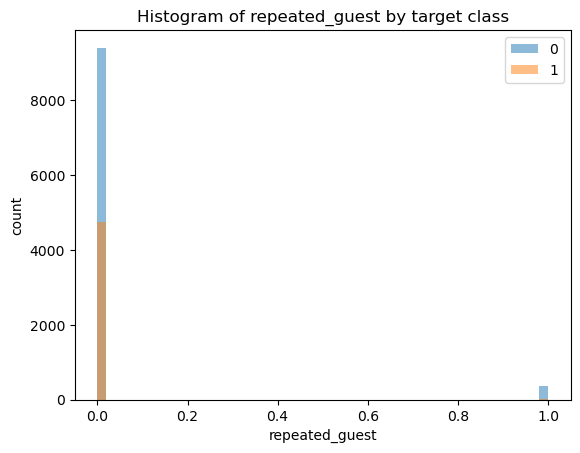

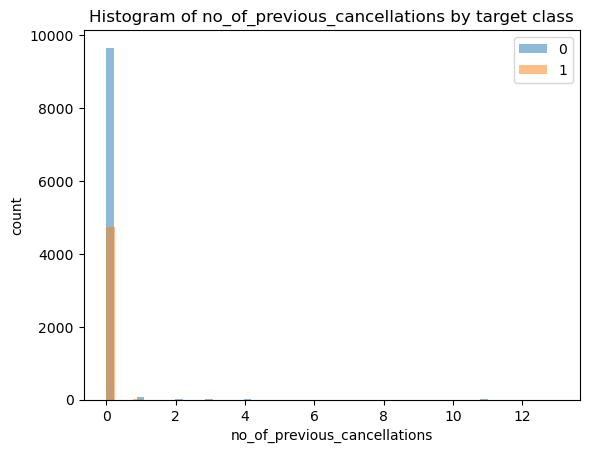

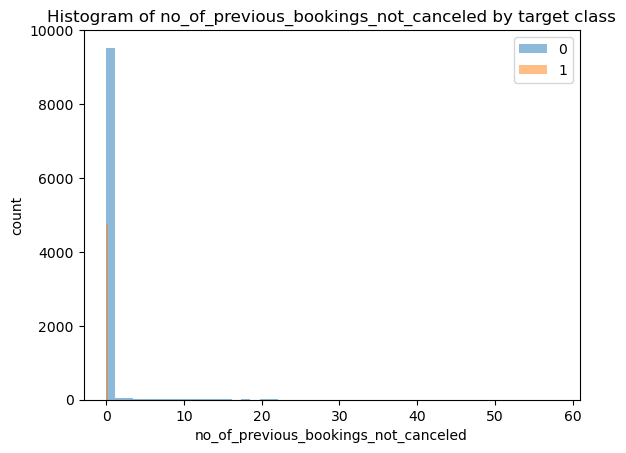

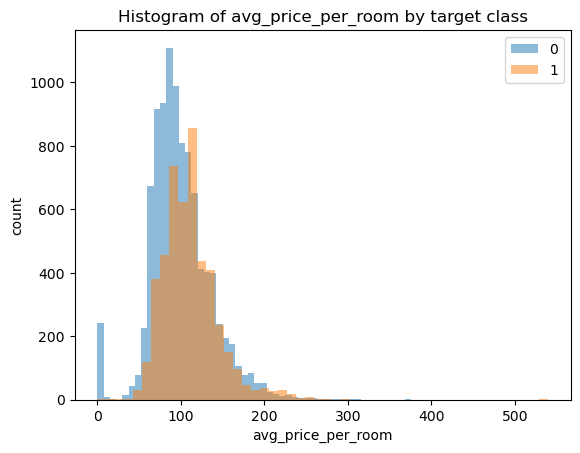

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000
mean,1.850851,0.109449,0.810807,2.210559,0.316011,0.032532,0.340134,85.308291,2017.819629,7.413812,15.652836,0.805500,0.024536,0.021504,0.151423,103.678081,0.621821,0.327038
std,0.515893,0.413799,0.873028,1.431309,0.627910,0.177413,0.776713,86.334770,0.384509,3.072301,8.793335,0.644863,0.154713,0.359909,1.703164,35.567967,0.790239,0.469148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.330000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.730000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,121.000000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [4]:
#Similar to my code from HW 2

#We are trying to predict if a customer will cancel, so positive will be a cancelation, which will be booking_status = 1
negative_examples = train.query("booking_status == 0")
positive_examples = train.query("booking_status == 1")

features = ["repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room"]

for feature in features:
    negatives = negative_examples[feature]
    positives = positive_examples[feature]
    plt.hist(negatives, bins=50, alpha=0.5, label=0)
    plt.hist(positives, bins=50, alpha=0.5, label=1)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title("Histogram of " + feature + " by target class")
    plt.legend()
    plt.show()


stats = train.describe()
stats

1. Histogram of Repeated Guest split between cancellations and kept
2. Histogram of Previous Cancellations split between cancellations and kept
3. Histogram of Previous Bookings not Canceled split between cancellations and kept
4. Histogram of Room Price split between cancellations and kept
5. General Summary Statistic for the data

In [5]:
ranges = stats.loc['max'] - stats.loc['min']
ranges

no_of_adults                              4.0
no_of_children                            9.0
no_of_weekend_nights                      7.0
no_of_week_nights                        17.0
type_of_meal_plan                         3.0
required_car_parking_space                1.0
room_type_reserved                        6.0
lead_time                               443.0
arrival_year                              1.0
arrival_month                            11.0
arrival_date                             30.0
market_segment_type                       4.0
repeated_guest                            1.0
no_of_previous_cancellations             13.0
no_of_previous_bookings_not_canceled     58.0
avg_price_per_room                      540.0
no_of_special_requests                    5.0
booking_status                            1.0
dtype: float64

6. The Ranges of each feature

I did a couple things. One was generating histograms for the 4 features I guessed would be useful from my analysis above. From the histograms, I can see a nice distribution difference for the room price feature, so that confirms that hunch. It seems that cheaper rooms are canceled less often. However, the other histograms did not give me obvious correlations and I wasn't able to confidently draw any conclusions for them. In fact, I was surprised to see very little correlation for the previous cancellations histogram. Perhaps the data is so small on the extreme ends that the graph doesn't show it.

The next summary statistic I generated was the general summary statistics for the data. I can immediately see that there is no imputation required, as there are 14509 complete entries in this data-set. Finally, I took a look at the ranges of the data to think about scaling. I can see that room price will definitely need to be scaled, as it has a very large range. In general, I think the majority of the data will need to be scaled.

Seeing how the data is spread over three columns, I was at first tempted to try to combine it into one feature. However, I was thinking that month, or day of the month, could be important information on it's own, that I wouldn't want to muddy up by combining it into just one feature. Maybe people cancel more in December, or on the 1st day of every month.

Since this model aims to predict the cancellation to save the hotel money, I carefully considered the outcomes of a false positive and false negative. A false negative means that the hotel thinks the customer is coming but they end up canceling, losing the hotel the opportunity to fill a room. A false positive means the hotel assumes the customer isn't coming and gives the room to someone else, which would really hurt the customer and the hotel's brand/relationship with the customer. Therefore, it seems like false positives could be much worse than false negatives. However, I have to consider that some hotel chains are not worried about brand perception with unhappy customers and just want to make money, while other hotel chains would never be willing to take the brand hit. Because this could depend a lot on the hotel chain or booking platform, I wouldn't want to make the choice for the stakeholder. Instead, I would want to present a strong model to them, and then find a metric that they care about most and focus on tuning the model for that metric.

Since I want a general metric that shows model performance to a variety of hotel-brand stakeholders, I don't want to choose precision or recall just yet. Instead, I will use the general accuracy of my model to compare them. If I had a real stakeholder to work with, I would want to identify their value function for a canceled room vs a displeased customer and tune my model to that metric.

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

From my exploratory data analysis, I can see that there are no categorical features and no missing features, so I don't need to worry about imputing or OHE etc. One thing I did identify was that I would need to do some scaling. Additionally, some of the features are binary features. In general, I would want to apply scaling on all the features, except I could ignore scaling the binary features because scaling doesn't mean anything for them. However, I will build a column transformer with inputs of the binary features just in case I every wanted to handle those two types differently. It will have a minimal effect on my model processing time and no effect on the outputs of my model.

In [6]:
# Adapted from my HW3
numeric_features = ["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","type_of_meal_plan","room_type_reserved","lead_time","arrival_year","arrival_month","arrival_date","market_segment_type","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"]
binary_features = ["required_car_parking_space","repeated_guest"]
target = "booking_status"
drop_features = [target]



In [7]:
# Adapted from my HW3 and Lecture 5 and Lecture 6 examples
X_train = train.drop(columns=drop_features)
y_train = train[target]

X_test = test.drop(columns=drop_features)
y_test = test[target]

numeric_features = list(set(numeric_features) - set(drop_features))
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (StandardScaler(), binary_features) #A seperate standard scaler is not strictly nessessary for binary data, but 
    # it allows me to come back and easily handle binary data in a different way by changing one line
)

pipe = make_pipeline(
    preprocessor
)

X_train_transformed = pd.DataFrame(pipe.fit_transform(X_train))
X_train_transformed.shape

(14509, 17)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [8]:
# function we used in class, which returns the mean cross-validation score along with standard deviation for a given model
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [9]:
# Adapted from my HW3

results_dict = {} # dictionary to store all the results

pipe = make_pipeline(
    preprocessor, DummyClassifier(strategy="prior")
)


results_dict["dummy classifier"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict)

,dummy classifier
fit_time,0.014 (+/- 0.004)
score_time,0.005 (+/- 0.001)
test_score,0.673 (+/- 0.000)
train_score,0.673 (+/- 0.000)


As expected, a dummy classifier just chooses the most common prediction in the training set and always predicts that. In this case, the most common value in the training set is 0, (not canceled), and the test and train accuracy of this model is the same as the overall distribution of the most common case in the data. However, it does give us a baseline to compare our other models against.

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [10]:
pipe = make_pipeline(
    preprocessor, LogisticRegression()
)


results_dict["LogisticRegression"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict)

,dummy classifier,LogisticRegression
fit_time,0.014 (+/- 0.004),0.035 (+/- 0.004)
score_time,0.005 (+/- 0.001),0.005 (+/- 0.000)
test_score,0.673 (+/- 0.000),0.794 (+/- 0.005)
train_score,0.673 (+/- 0.000),0.795 (+/- 0.002)


In [27]:
hyper_param_dict = {}
Cs = np.logspace(-3, 3, num=7, base=10)

for C_val in Cs:
    pipe = make_pipeline(preprocessor, LogisticRegression(C=C_val))
    k = "C = " + str(C_val);
    hyper_param_dict[k] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(hyper_param_dict)

,C = 0.001,C = 0.01,C = 0.1,C = 1.0,C = 10.0,C = 100.0,C = 1000.0
fit_time,0.029 (+/- 0.006),0.037 (+/- 0.006),0.031 (+/- 0.002),0.040 (+/- 0.004),0.034 (+/- 0.005),0.033 (+/- 0.004),0.030 (+/- 0.002)
score_time,0.006 (+/- 0.001),0.006 (+/- 0.001),0.005 (+/- 0.001),0.006 (+/- 0.001),0.006 (+/- 0.002),0.006 (+/- 0.001),0.005 (+/- 0.001)
test_score,0.783 (+/- 0.003),0.793 (+/- 0.005),0.794 (+/- 0.006),0.794 (+/- 0.005),0.794 (+/- 0.005),0.794 (+/- 0.005),0.794 (+/- 0.005)
train_score,0.784 (+/- 0.002),0.793 (+/- 0.002),0.795 (+/- 0.002),0.795 (+/- 0.002),0.795 (+/- 0.002),0.795 (+/- 0.002),0.795 (+/- 0.002)


I was actually suprised to see a somewhat low value for the LogisticRegression model. The dummy classifier gave me an accuracy around 67%, so logistic regression only reaching around 80% was suprising to me. It is interesting to see that the train score is just as low, instead of nearing 100% like I've often seen. I was also very interested to see that the C hyperparameter tuning had very little effect. Once C reaches around 0.1 nothing changed significantly by increasing C, while lower C values had a slightly slightly lower accuracy. This makes me excited to see if other models can do better.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [14]:
#Based on Lecture 11 and my HW 3
models = {
    "decision tree": DecisionTreeClassifier(max_depth=50),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=123, n_jobs=-1, n_estimators=100)
}
for key in models.keys():
    pipe = make_pipeline(preprocessor, models[key])
    results_dict[key] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
    
pd.DataFrame(results_dict)

,dummy classifier,LogisticRegression,decision tree,kNN,RBF SVM,Random Forest
fit_time,0.014 (+/- 0.004),0.035 (+/- 0.004),0.050 (+/- 0.004),0.013 (+/- 0.000),3.719 (+/- 0.188),0.383 (+/- 0.007)
score_time,0.005 (+/- 0.001),0.005 (+/- 0.000),0.006 (+/- 0.001),0.179 (+/- 0.003),1.887 (+/- 0.156),0.038 (+/- 0.003)
test_score,0.673 (+/- 0.000),0.794 (+/- 0.005),0.849 (+/- 0.007),0.831 (+/- 0.004),0.835 (+/- 0.004),0.890 (+/- 0.006)
train_score,0.673 (+/- 0.000),0.795 (+/- 0.002),0.996 (+/- 0.000),0.884 (+/- 0.002),0.851 (+/- 0.002),0.996 (+/- 0.000)


I tried a few different models: decision tree with a max_depth of 50, a nearest neighbors, a RBF SVM, and a Random Forest model. All of them had a higher validation accuracy than the logistic regression. So far it seems very easy to beat Logistic Regression. The Random Forest had the higher validation accuracy of all the models, followed by the decision tree, followed by RBF SVM, followed by kNN, followed by Logistic Regression. Both Random Forest and the decision tree have a very high training score and are likely to be overfitting. In the hyperparameter optimization section, I would like to tune their hyperparameters and continue to compare them to RBF SVM, the highest performing model that doesn't show much overfitting. 

I am especially interested in the decision tree model, as decision trees are a very easy model to communicate to stakeholders and are very fast to score and fit (ideal for a system with many users that might not be top of the line like for a hotel).

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [ ]:
# Hyperparameter optimization for decision tree
# Tune max_depth
tree_tune_results = {}
depths = np.linspace(1, 1001, 251)

for depth in depths:
    depth = int(depth)
    pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=depth))
    tree_tune_results[depth] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(tree_tune_results)

validation_accuracy = pd.DataFrame(tree_tune_results).iloc[2]
validation_accuracy = [val.split(" ")[0] for val in validation_accuracy]
validation_accuracy = [float(val) for val in validation_accuracy]

# Create a plot
plt.plot(depths, validation_accuracy)

# Add axis labels and a title
plt.xlabel('Decision Tree Depth')
plt.ylabel('Validation Accuracy')
plt.title('Decision Tree Depth vs Validation Accuracy')

# Display the plot
print("Hyperparameter optimization for Single Decision Tree")
plt.show()

In [50]:
# Hyperparameter optimization for Random Forest
# Tune n_estimators and max_depth
depths = np.linspace(1, 201, 5)
depths = np.round(depths).astype(int)
forest_tune_results = {}
estimator_counts = np.linspace(1, 201, 7)
estimator_counts = np.round(estimator_counts).astype(int)

for depth in depths:
    for estimators in estimator_counts:
        depth = int(depth)
        estimators = int(estimators)
        pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1, n_estimators=estimators, max_depth=depth))
        result = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
        result = result['test_score']
        forest_tune_results[(depth, estimators)] = result






In [51]:
print("Hyperparameter optimization for Random Forest")
print("Max Tree Depth along the side, Estimator Count along the top, Validation Accuracy as the table values")
w = max(depths.shape)
h = max(estimator_counts.shape)
# Create an empty DataFrame with the specified size
df = pd.DataFrame(index=range(w), columns=estimator_counts)

# Fill the DataFrame with random values using a double for loop
for i in range(w):
    for j in range(h):
        i = int(i)
        j = int(j)
        df.iloc[i, j] = forest_tune_results[(int(depths[i]),int(estimator_counts[j]))]
        
#Re-lable DataFrame
df.index = depths
# Print the resulting DataFrame
df

Hyperparameter optimization for Random Forest
Max Tree Depth along the side, Estimator Count along the top, Validation Accuracy as the table values


,1,34,68,101,134,168,201
1,0.761 (+/- 0.005),0.684 (+/- 0.024),0.673 (+/- 0.000),0.673 (+/- 0.000),0.673 (+/- 0.000),0.673 (+/- 0.000),0.673 (+/- 0.000)
51,0.828 (+/- 0.004),0.888 (+/- 0.004),0.890 (+/- 0.006),0.889 (+/- 0.006),0.891 (+/- 0.005),0.890 (+/- 0.005),0.890 (+/- 0.005)
101,0.828 (+/- 0.004),0.888 (+/- 0.004),0.890 (+/- 0.006),0.889 (+/- 0.006),0.891 (+/- 0.005),0.890 (+/- 0.005),0.890 (+/- 0.005)
151,0.828 (+/- 0.004),0.888 (+/- 0.004),0.890 (+/- 0.006),0.889 (+/- 0.006),0.891 (+/- 0.005),0.890 (+/- 0.005),0.890 (+/- 0.005)
201,0.828 (+/- 0.004),0.888 (+/- 0.004),0.890 (+/- 0.006),0.889 (+/- 0.006),0.891 (+/- 0.005),0.890 (+/- 0.005),0.890 (+/- 0.005)


In [53]:
# Try out the new, tuned models

pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=50))
results_dict["decision tree (Optimized)"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1, n_estimators=68, max_depth=51))
results_dict["Random Forest (Optimized)"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

pd.DataFrame(results_dict)

,dummy classifier,LogisticRegression,decision tree,kNN,RBF SVM,Random Forest,decision tree (Tuned),Random Forest (Tuned)
fit_time,0.014 (+/- 0.004),0.035 (+/- 0.004),0.050 (+/- 0.004),0.013 (+/- 0.000),3.719 (+/- 0.188),0.383 (+/- 0.007),0.063 (+/- 0.010),0.303 (+/- 0.023)
score_time,0.005 (+/- 0.001),0.005 (+/- 0.000),0.006 (+/- 0.001),0.179 (+/- 0.003),1.887 (+/- 0.156),0.038 (+/- 0.003),0.009 (+/- 0.003),0.031 (+/- 0.003)
test_score,0.673 (+/- 0.000),0.794 (+/- 0.005),0.849 (+/- 0.007),0.831 (+/- 0.004),0.835 (+/- 0.004),0.890 (+/- 0.006),0.847 (+/- 0.007),0.890 (+/- 0.006)
train_score,0.673 (+/- 0.000),0.795 (+/- 0.002),0.996 (+/- 0.000),0.884 (+/- 0.002),0.851 (+/- 0.002),0.996 (+/- 0.000),0.996 (+/- 0.000),0.996 (+/- 0.000)


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 